In [1]:
import numpy as np 
import sklearn.svm
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
plt.ion()

 Importation de la Base de données

In [2]:
os.chdir('/Users/farah/Documents/INFO/Cours_ET4/MachineLearning/ProjetIA')
heartt = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',', header=0)
heart = heartt.iloc[np.random.permutation(heartt.index)].reset_index(drop=True)
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,50.0,0,582,1,38,0,310000.0,1.9,135,1,1,35,1
1,66.0,1,72,0,40,1,242000.0,1.2,134,1,0,121,0
2,55.0,0,835,0,40,0,279000.0,0.7,140,1,1,147,0
3,80.0,1,123,0,35,1,388000.0,9.4,133,1,1,10,1
4,75.0,0,675,1,60,0,265000.0,1.4,125,0,0,205,0


In [3]:
heartt.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

target = ['DEATH_EVENT']

In [5]:
#iris_features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
                 
# Extract features
#A = heart.loc[:, iris_features].values

In [6]:
target

['DEATH_EVENT']

Etablissement des matrices

In [7]:
X = np.asarray(features)
Y = np.asarray(target)
print("Le X est de dimension" , X.shape )
print("Le Y est de dimension" , Y.shape )

Le X est de dimension (12,)
Le Y est de dimension (1,)


In [8]:
A = heart.loc[:, features].values

In [9]:
B = heart.loc[:, target].values

Répartissons nos entrainements et nos tests

In [134]:
from sklearn.model_selection import train_test_split
#On prends 70% de trains et 20% de tests
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size=0.2, random_state=42)



In [28]:
taille_données = A.shape[0]
taille_données

299

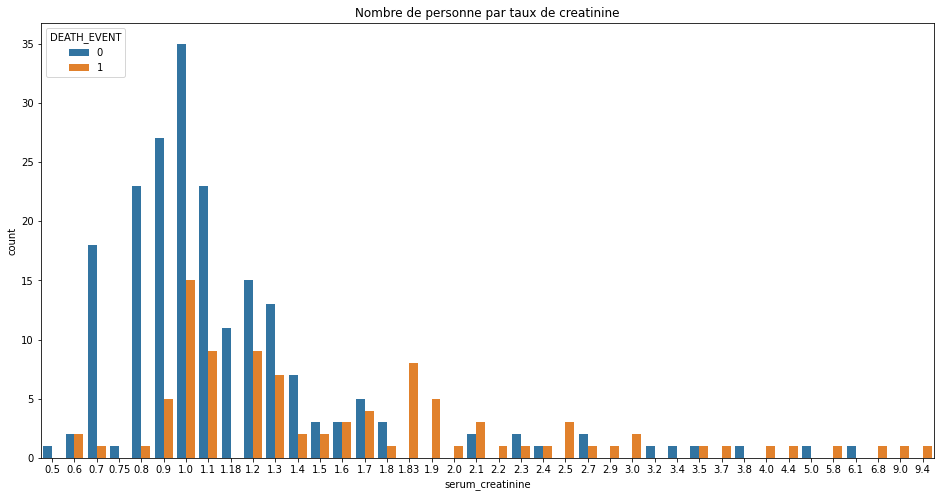

In [11]:
    import seaborn as sns
    plt.figure(figsize=(16,8))
    #plt.style.use(['seaborn-bright','dark_background'])
    #sns.countplot(x = heart[i],data = data, hue = 'class', palette='hsv')
    # count plot on single categorical variable
    sns.countplot(x = 'serum_creatinine',hue ='DEATH_EVENT', data = heart)
    #plt.style.use(['seaborn-bright','dark_background'])
    # Show the plot
    plt.title("Nombre de personne par taux de creatinine")
    plt.show()

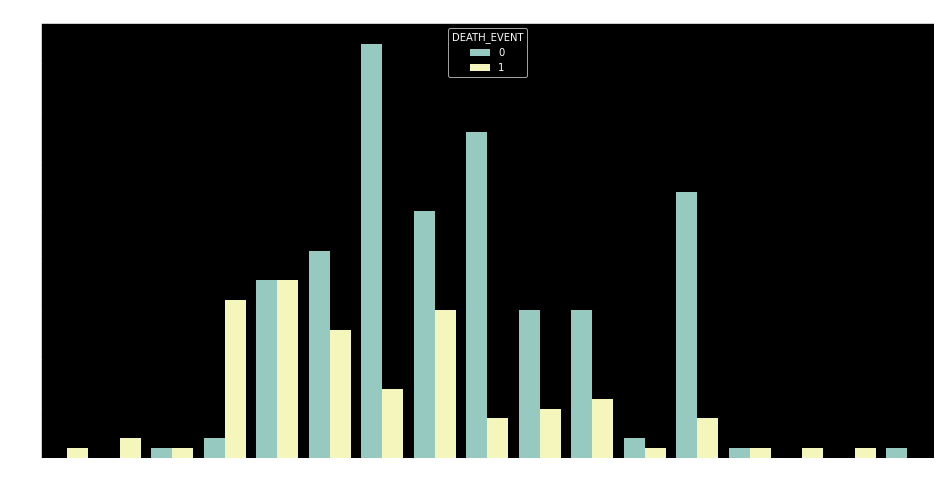

In [12]:
    import seaborn as sns
    plt.figure(figsize=(16,8))
    plt.style.use(['seaborn-bright','dark_background'])
    #sns.countplot(x = heart[i],data = data, hue = 'class', palette='hsv')
    # count plot on single categorical variable
    sns.countplot(x = 'ejection_fraction',hue ='DEATH_EVENT', data = heart)
    #plt.style.use(['seaborn-bright','dark_background'])
    # Show the plot
    plt.title("Nombre de personne par taux d'ejection fraction")
    plt.show()

In [13]:
print("Les X_train ont maintenant 209 lignes -->", X_train.shape)

Les X_train ont maintenant 209 lignes --> (239, 12)


On effectue maintenant une SVM

In [14]:
from sklearn import svm
clf = sklearn.svm.SVC(kernel='linear', C=1)
clf.fit(X_train,Y_train)
y_predict = clf.predict(X_test)

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [15]:
print("training score:",clf.score(X_train,Y_train))
print("test score:",clf.score(X_test,Y_test))

training score: 0.8117154811715481
test score: 0.7333333333333333


In [21]:
#from sklearn import model_selection
#scores_res = model_selection.cross_val_score(clf, A, B, cv=5)

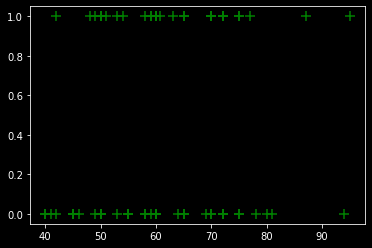

In [16]:
suppVect = clf.support_vectors_ ## TODO : recuperer les vecteurs supports, en utilisant l'objet "clf"
size=100
plt.scatter(suppVect[:,0],suppVect[:,1], c = 'green', s = size, marker='+')
## TODO: tracer aussi les points de l'ensemble de validation (en plus petits, ou autres couleur, etc)

In [20]:
features2 = ['ejection_fraction', 'serum_creatinine']

target2 = ['DEATH_EVENT'] 

In [78]:
X_train.shape[0]*4

224

In [156]:
def load_train_et_val(X_TRAIN,place):
    taille = X_TRAIN.shape[0]
    decoupe = int(taille/5)
    if place == 5 :
        X_train = A[: decoupe*4]
        y_train = B[: decoupe*4]
        X_valid = A[decoupe*4:taille] # X[-Ntest:] est equivalent
        y_valid = B[decoupe*4:taille] # X[-Ntest:] est equivalent
    if place == 4 :
        numeroX1 = A[0: decoupe*3]
        numeroX2 = A[decoupe*4:taille]
        numeroY1 = B[0: decoupe*3]
        numeroY2 = B[decoupe*4:taille] 
        X_train = np.concatenate((numeroX1,numeroX2))
        y_train = np.concatenate((numeroY1,numeroY2))
        X_valid = A[decoupe:decoupe*2] # X[-Ntest:] est equivalent
        y_valid = B[decoupe:decoupe*2] # X[-Ntest:] est equivalentalid = B[decoupe*3:decoupe*4] # X[-Ntest:] est equivalent
    if place == 3 :
        numeroX1 = A[0: decoupe*2]
        numeroX2 = A[decoupe*3:taille]
        numeroY1 = B[0: decoupe*2]
        numeroY2 = B[decoupe*3:taille] 
        X_train = np.concatenate((numeroX1,numeroX2))
        y_train = np.concatenate((numeroY1,numeroY2))
        X_valid = A[decoupe:decoupe*2] # X[-Ntest:] est equivalent
        y_valid = B[decoupe:decoupe*2] # X[-Ntest:] est equivalent
    if place == 2 :
        numeroX1 = A[0: decoupe]
        numeroX2 = A[decoupe*2:taille]
        numeroY1 = B[0: decoupe]
        numeroY2 = B[decoupe*2:taille] 
        X_train = np.concatenate((numeroX1,numeroX2))
        y_train = np.concatenate((numeroY1,numeroY2))
        X_valid = A[decoupe:decoupe*2] # X[-Ntest:] est equivalent
        y_valid = B[decoupe:decoupe*2] # X[-Ntest:] est equivalent
    if place == 1 :
        X_train = A[decoupe*2:taille]
        y_train = B[decoupe*2:taille]
        X_valid = A[:decoupe] # X[-Ntest:] est equivalent
        y_valid = B[:decoupe] # X[-Ntest:] est equivalent
    return X_train, y_train, X_valid, y_valid

In [159]:
#Mettre la position
x1_train, y1_train, X1_valid, y1_valid = load_train_et_val(X_train,3)

In [160]:
x1_train.shape, y1_train.shape, X1_valid.shape, y1_valid.shape, 

((192, 12), (192, 1), (47, 12), (47, 1))

In [223]:
from sklearn import tree

clf_train1 = sklearn.svm.SVC(kernel='linear', C=1)
clf_train1.fit(x1_train,y1_train)
print(clf_train1.score(x1_train,y1_train))

clf_train = tree.DecisionTreeClassifier()

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7708333333333334


In [221]:
clf_valid1 = sklearn.svm.SVC(kernel='linear', C=1)
clf_valid1.fit(X1_valid,y1_valid)
print(clf_valid1.score(X1_valid,y1_valid))

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8085106382978723


((192, 12), (192, 1), (47, 12), (47, 1))

In [18]:
X2 = heart.loc[:, features2].values
Y2 = heart.loc[:, target2].values

In [19]:
X2.shape, Y2.shape

((299, 2), (299, 1))

In [39]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.5, random_state=42)

In [40]:
clf_2 = sklearn.svm.SVC(kernel='linear', C=1)
clf_2.fit(X2_train,Y2_train)

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1, kernel='linear')

In [41]:
print("training score:",clf_2.score(X2_train,Y2_train))
print("test score:",clf_2.score(X2_test,Y2_test))

training score: 0.8053691275167785
test score: 0.62


Passons à la PCA

In [42]:
from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(heart)
df_std

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
        -6.87681906e-01, -1.62950241e+00,  1.45416070e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
        -6.87681906e-01, -1.60369074e+00,  1.45416070e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         1.45416070e+00, -1.59078490e+00,  1.45416070e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -6.87681906e-01,  1.90669738e+00, -6.87681906e-01],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         1.45416070e+00,  1.93250906e+00, -6.87681906e-01],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         1.45416070e+00,  1.99703825e+00, -6.87681906e-01]])

In [46]:
df_cov_matrix = np.cov(df_std.T)
#df_cov_matrix

In [212]:
#eig_vals, eig_vecs = np.linalg.eig(heart)

In [211]:
#eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i])

#for i in range(len(eig_vals))]
 #   print(‘Eigenvalues in descending order:’)
#for i in eig_pairs:
 #   print(i[0])

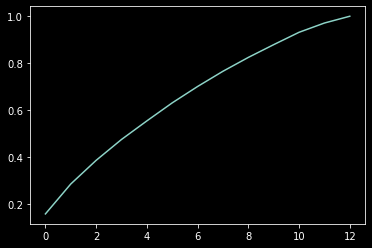

In [45]:
from sklearn.decomposition import PCA

pca = PCA().fit(df_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel(‘No of components’)
#plt.ylabel(‘Cumulative explained variance’)
plt.show()

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


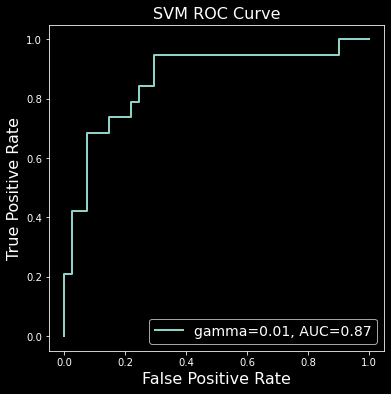

In [23]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

from sklearn import svm
classifier = svm.SVC(kernel='linear', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train_std, Y_train)

Y_test_pred = classifier.decision_function(X_test_std)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(Y_test, Y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


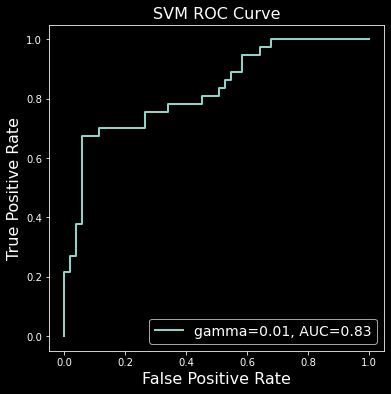

In [52]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

from sklearn import svm
classifier = svm.SVC(kernel='linear', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train_std, Y_train)

y_test_pred = classifier.decision_function(X_test_std)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(Y_test, Y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

In [55]:
dataframe = heart[features]
Pos = np.where(B==1, 0, 1)

In [56]:
df_pos = heart[heart.DEATH_EVENT==1]
df_neg = heart[heart.DEATH_EVENT==0]

features_pos = df_pos[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]

reste_pos = df_pos[['DEATH_EVENT']]

x_pos = np.asarray(features_pos)

Y_pos = np.asarray(reste_pos)

In [57]:
from sklearn.model_selection import train_test_split
X_train_pos, X_test_pos, Y_train_pos, Y_test_pos = train_test_split(x_pos, Y_pos, test_size=0.2, random_state = 4)

In [58]:
X_train_pos.shape, Y_train_pos.shape

((76, 12), (76, 1))

In [61]:
fpr.shape

(30,)

In [24]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [25]:
Y_test

array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [209]:
i = 0
nombre_FP = 0
nombre_FN = 0

while i < y_predict.shape[0]:
    i = i+1
    if(y_predict[i-1]!=Y_test[i-1] & Y_test[i-1]==1) :
        nombre_FN = nombre_FN + 1
    if(y_predict[i-1]!=Y_test[i-1] & Y_test[i-1]==0) :
        nombre_FP = nombre_FP + 1

In [210]:
print(nombre_FP)
print(nombre_FN)

2
14
